In [1]:
from fastai.vision.all import *
import fastai
import timm
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

/grupoa/config/miniconda3/envs/fastai/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
import torch
torch.cuda.set_device(0)

In [3]:
df = pd.read_csv('data/wheat_new.csv',decimal=',')

In [4]:
name = 'vit_base_patch16_384'

In [5]:
df

,Unnamed: 0,file,DAS,plot nº,photo nº,species,water_treatment,management,plot m2,avg_water (L m-2),...,P (kg microplot-1),K (kg microplot-1),avg_height,GA,GGA,CSI,NGRDIveg,TGIveg,final yield (kg),dataset
0,0,20220517_1 (1).JPG,96,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.959407,0.904393,5.734098,0.1324,2569.2709,9.15,train
1,1,20220517_1 (2).JPG,96,1,(2).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.963030,0.905523,5.971505,0.1316,2648.0105,9.15,train
2,2,20220517_1 (3).JPG,96,1,(3).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.953708,0.898722,5.765430,0.1331,2736.4337,9.15,train
3,3,20220517_1 (4).JPG,96,1,(4).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.957117,0.898772,6.095965,0.1267,2550.8238,9.15,train
4,4,20220602_1 (1).JPG,112,1,(1).,wheat,ww,conv,12,3096.2375,...,0.072,0.072,46.9715,0.892348,0.791199,11.335180,0.1008,1880.2128,9.15,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,20220615_25 (4).JPG,125,25,(4).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.788544,0.323428,58.984136,0.0491,2277.6824,7.95,test
252,252,20220701_25 (1).JPG,141,25,(1).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.031868,0.009072,71.532905,0.0342,946.1760,7.95,test
253,253,20220701_25 (2).JPG,141,25,(2).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.025828,0.006849,73.483356,0.0314,867.4491,7.95,test
254,254,20220701_25 (3).JPG,141,25,(3).,wheat,d,conv,12,2752.8000,...,0.072,0.072,55.2110,0.022065,0.004773,78.367629,0.0196,855.3556,7.95,test


In [6]:
scaler = MinMaxScaler()

In [7]:
df.columns

Index(['Unnamed: 0', 'file', 'DAS', 'plot nº', 'photo nº', 'species',
       'water_treatment', 'management', 'plot m2', 'avg_water (L m-2)',
       'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
       'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
       'final yield (kg)', 'dataset'],
      dtype='object')

In [8]:
dftrain = df[(df.dataset=='train')]
# dftrain.loc[:,['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']] = scaler.fit_transform(dftrain[['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']])
dfvalid = df[(df.dataset=='validation')]
dftest = df[(df.dataset=='test')]
# dfvalid.loc[:,['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']] = scaler.transform(dfvalid[['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']])        
# dftest.loc[:,['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']] = scaler.transform(dftest[['plot m2', 'avg_water (L m-2)',
#        'N (kg microplot-1)', 'P (kg microplot-1)', 'K (kg microplot-1)',
#        'avg_height', 'GA', 'GGA', 'CSI', 'NGRDIveg', 'TGIveg',
#        'final yield (kg)']])                   

In [9]:
dftrain = pd.concat([dftrain,dfvalid])

In [10]:
df = pd.concat([dftrain,dftest])

In [11]:
dftrain.loc[:,'dataset'] =  dftrain['dataset'].apply(lambda x: x=='validation')
df.loc[:,'dataset'] =  df['dataset'].apply(lambda x: x=='test')

In [12]:
# dftrain.loc[:,'final yield (kg)'] = dftrain['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))
# df.loc[:,'final yield (kg)'] = df['final yield (kg)'].apply(lambda x : (x - 0.8579)/(10.55-0.8579))

In [13]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname=name+'_WPNK_new'), #convnext_yield_all_minmax
    # ReduceLROnPlateau()
]

In [14]:
from fastai.metrics import mae,rmse,mse

In [15]:
db = DataBlock(blocks = (ImageBlock,
                         RegressionBlock(),RegressionBlock(),RegressionBlock(),RegressionBlock(),
                         RegressionBlock(),RegressionBlock(),RegressionBlock()),
                 get_x=[ColReader('file',pref='wheat_all/'),
                    
                        ],
                 get_y=[#ColReader('species'),
                        #ColReader('water_treatment'),
                        #ColReader('management'),
                        ColReader('plot m2'),
                        ColReader('avg_height'),
                        ColReader('avg_water (L m-2)'),
                        ColReader('N (kg microplot-1)'),
                        ColReader('P (kg microplot-1)'),
                        ColReader('K (kg microplot-1)'),
                        ColReader('final yield (kg)')],
                        # ColReader('GA'),
                        # ColReader('GGA'),
                        # ColReader('CSI'),
                        # ColReader('NGRDIveg'),
                        # ColReader('TGIveg')
                 splitter=ColSplitter(col='dataset'),    
                 item_tfms = Resize(512),
                 batch_tfms=[*aug_transforms(size=384,flip_vert=True,
                                            max_zoom=1.0), Normalize.from_stats(*imagenet_stats)],
               n_inp=1)
dls = db.dataloaders(dftrain,bs=4)

In [16]:
class MultiInputModel(Module):
  "A three-headed model given a `body` and `n` output features"
  def __init__(self, body:nn.Sequential):
    nf = 1
    self.body = body
    #self.water_treatment = create_head(nf, 4)
    #self.management = create_head(nf, 2)
    self.avg_water = create_head(nf,1)
    self.n = create_head(nf,1)
    self.p = create_head(nf,1)
    self.k = create_head(nf,1)
    self.avg_height = create_head(nf,1)
    self.ga = create_head(nf,1)
    self.gga = create_head(nf,1)
    self.csi = create_head(nf,1)
    self.NGRDIveg = create_head(nf,1)
    self.TGIveg = create_head(nf,1)
    self.yieldprod = create_head(nf,1)

    
    
  
  def forward(self, x):
    y = self.body(x)
    return [
        #self.water_treatment(y),
        #self.management(y),
        self.avg_water(y),
        self.n(y),
        self.p(y),
        self.k(y),
        self.avg_height(y),
        self.ga(y),
        self.gga(y),
        self.csi(y),
        self.NGRDIveg(y),
        self.TGIveg(y),
        self.yieldprod(y)]

In [17]:
model = timm.create_model(name,num_classes=1,pretrained=True)
body = nn.Sequential(*list(model.children())[:-1])
net = MultiInputModel(body)

In [18]:
class CombinationLoss(Module):
    "Cross Entropy Loss on multiple targets"
    def __init__(self, func1=F.cross_entropy,func2=F.mse_loss, weights=[2, 1]):
        self.func1, self.func2, self.w = func2, func2, weights

    def forward(self, xs, *ys, reduction='mean'):
        res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
        for i in range(1,6):
            res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
        res = res + self.func2(ys[6],torch.reshape(xs[6],(4,1)))
        return res
    

In [19]:
learn = Learner(dls, net, loss_func=CombinationLoss(),cbs=callbacks)

In [20]:
# learn.lr_find()

In [21]:
learn.freeze()

epoch,train_loss,valid_loss,time
0,8175579.000000,9425953.000000,00:47
1,8160263.500000,9425058.000000,00:45
2,8161755.000000,9432526.000000,00:46
3,8165264.000000,9412970.000000,00:46
4,8162112.000000,9428739.000000,00:44
5,8153750.000000,9420894.000000,00:44
6,8141569.500000,9409310.000000,00:39
7,8138344.000000,9419209.000000,00:30
8,8135990.500000,9419751.000000,00:33
9,8149208.500000,9400358.000000,00:28


/tmp/ipykernel_1554054/3279080324.py:7: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
/tmp/ipykernel_1554054/3279080324.py:9: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
/tmp/ipykernel_1554054/3279080324.py:10: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[6],torch.reshape(xs[6],(4,1)))


Better model found at epoch 0 with valid_loss value: 9425953.0.


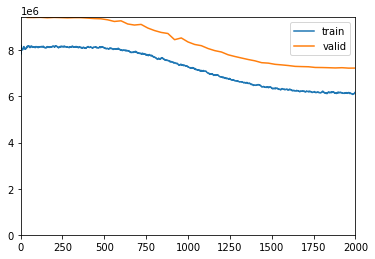

Better model found at epoch 1 with valid_loss value: 9425058.0.
Better model found at epoch 3 with valid_loss value: 9412970.0.
Better model found at epoch 6 with valid_loss value: 9409310.0.
Better model found at epoch 9 with valid_loss value: 9400358.0.
Better model found at epoch 10 with valid_loss value: 9381108.0.
Better model found at epoch 11 with valid_loss value: 9370378.0.
Better model found at epoch 12 with valid_loss value: 9326575.0.
Better model found at epoch 13 with valid_loss value: 9254559.0.
Better model found at epoch 15 with valid_loss value: 9144898.0.
Better model found at epoch 16 with valid_loss value: 9099370.0.
Better model found at epoch 18 with valid_loss value: 8969345.0.
Better model found at epoch 19 with valid_loss value: 8860738.0.
Better model found at epoch 20 with valid_loss value: 8778774.0.
Better model found at epoch 21 with valid_loss value: 8732581.0.
Better model found at epoch 22 with valid_loss value: 8464082.0.
Better model found at epoch 2

In [22]:
learn.fit_one_cycle(50,lr_max=1e-3)

In [23]:
learn.unfreeze()

epoch,train_loss,valid_loss,time
0,6165921.000000,7239606.000000,00:48
1,6160634.000000,7232471.000000,00:49
2,6165088.500000,7236671.000000,00:48
3,6163534.000000,7238523.000000,00:47
4,6148673.000000,7229250.000000,00:48
5,6153622.000000,7222905.500000,00:50
6,6147132.000000,7219139.000000,00:52
7,6134754.500000,7192810.000000,00:52
8,6127002.500000,7185082.000000,00:52
9,6122089.000000,7172340.500000,00:53


/tmp/ipykernel_1554054/3279080324.py:7: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
/tmp/ipykernel_1554054/3279080324.py:9: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
/tmp/ipykernel_1554054/3279080324.py:10: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[6],torch.reshape(xs[6],(4,1)))


Better model found at epoch 0 with valid_loss value: 7239606.0.


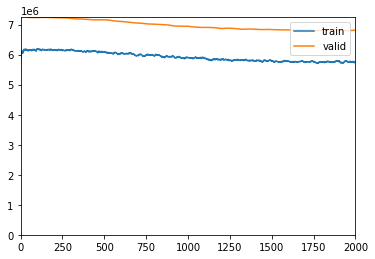

Better model found at epoch 1 with valid_loss value: 7232471.0.
Better model found at epoch 4 with valid_loss value: 7229250.0.
Better model found at epoch 5 with valid_loss value: 7222905.5.
Better model found at epoch 6 with valid_loss value: 7219139.0.
Better model found at epoch 7 with valid_loss value: 7192810.0.
Better model found at epoch 8 with valid_loss value: 7185082.0.
Better model found at epoch 9 with valid_loss value: 7172340.5.
Better model found at epoch 10 with valid_loss value: 7155692.5.
Better model found at epoch 12 with valid_loss value: 7154866.5.
Better model found at epoch 13 with valid_loss value: 7119400.5.
Better model found at epoch 14 with valid_loss value: 7103815.5.
Better model found at epoch 15 with valid_loss value: 7083582.5.
Better model found at epoch 16 with valid_loss value: 7056889.0.
Better model found at epoch 17 with valid_loss value: 7044088.0.
Better model found at epoch 18 with valid_loss value: 7020479.0.
Better model found at epoch 19 w

In [24]:
learn.fit_one_cycle(50,lr_max=1e-4)

In [25]:
dls = db.dataloaders(df,bs=4)
learn.dls=dls

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
preds,gt = learn.get_preds()

/tmp/ipykernel_1554054/3279080324.py:7: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = self.func2(ys[0],torch.reshape(xs[0],(4,1)))
/tmp/ipykernel_1554054/3279080324.py:9: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[i],torch.reshape(xs[i],(4,1)))
/tmp/ipykernel_1554054/3279080324.py:10: UserWarning: Using a target size (torch.Size([4, 1])) that is different to the input size (torch.Size([4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  res = res + self.func2(ys[6],torch.reshape(xs[6],(4,1)))


In [28]:
mean_absolute_error(gt,preds)

ValueError: Found input variables with inconsistent numbers of samples: [7, 11]

In [ ]:
mean_squared_error(gt,preds)

In [ ]:
math.sqrt(mean_squared_error(gt,preds))